In [1]:
import numpy as np
import urllib.request
# url with dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# download the file
raw_data = urllib.request.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")
# separate the data from the target attributes
X = dataset[:,0:7]
y = dataset[:,8]
X

array([[   6.   ,  148.   ,   72.   , ...,    0.   ,   33.6  ,    0.627],
       [   1.   ,   85.   ,   66.   , ...,    0.   ,   26.6  ,    0.351],
       [   8.   ,  183.   ,   64.   , ...,    0.   ,   23.3  ,    0.672],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,  112.   ,   26.2  ,    0.245],
       [   1.   ,  126.   ,   60.   , ...,    0.   ,   30.1  ,    0.349],
       [   1.   ,   93.   ,   70.   , ...,    0.   ,   30.4  ,    0.315]])

In [3]:
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
#看结果就知道有明显的过拟合

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       500
        1.0       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       768

[[500   0]
 [  0 268]]


### 先来试一下简单的运用

[1 8]
[1, 8]
[[1 8]]
[1]
[ 3 20]
[3, 20]
[[ 3 20]]
[1]
[ 1 15]
[1, 15]
[[ 1 15]]
[-1]
[ 3 35]
[3, 35]
[[ 3 35]]
[-1]
[ 5 35]
[5, 35]
[[ 5 35]]
[1]
[ 4 40]
[4, 40]
[[ 4 40]]
[-1]
[ 7 80]
[7, 80]
[[ 7 80]]
[-1]
[ 6 49]
[6, 49]
[[ 6 49]]
[1]
[[ 3 11]
 [ 5 10]
 [ 8 12]
 [10  2]
 [ 3  8]
 [13  3]
 [ 7  3]
 [14  6]
 [12  9]
 [ 5  1]
 [ 2 12]
 [12  1]
 [ 3  7]
 [ 5  5]
 [ 3 11]]


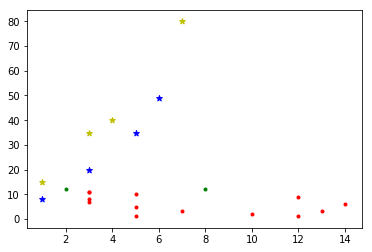

             precision    recall  f1-score   support

         -1       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00         8

[[4 0]
 [0 4]]


In [71]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
 
#准备训练样本
x=[[1,8],[3,20],[1,15],[3,35],[5,35],[4,40],[7,80],[6,49]]
y=[1,1,-1,-1,1,-1,-1,1]
 
##开始训练
clf=svm.SVC() ##默认参数：kernel='rbf'
plt.subplot(111)
clf.fit(x,y)
##根据训练出的模型绘制样本点
for i in x:
    print(np.array(i))
    res=clf.predict(np.array(i).reshape(1, -1))
    print(i)
    print(np.array(i).reshape(1, -1))
    print(res)
    if res > 0:
         plt.scatter(i[0],i[1],c='b',cmap=plt.cm.Paired,marker='*')
    else :
         plt.scatter(i[0],i[1],c='y',marker='*')
 
 # 成随机实验数据(15行2列)
rdm_arr=np.random.randint(1, 15, size=(15,2))
print(rdm_arr)
##回执实验数据点
for i in rdm_arr:
    res=clf.predict(np.array(i).reshape(1, -1))
    if res > 0:
        plt.scatter(i[0],i[1],c='r',marker='.')
    else :
        plt.scatter(i[0],i[1],c='g',marker='.')
##显示绘图结果
plt.show()
expected = y
predicted = clf.predict(x)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

### 感觉很乱 重新整理得到 还不是很明白 继续找example

In [87]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from numpy import *

# download the dataset
iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data           
iris_target = iris_dataset.target

# split data and target into training set and testing set
# 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size = 0.2)
# construct SVC by using rbf as kernel function
SVC_0 = SVC(kernel = 'rbf')
SVC_0.fit(x_train, y_train)

predict = SVC_0.predict(x_test)
right = sum(predict == y_test)
# accuracy rate
print("%f%%" % (right * 100.0 / predict.shape[0]))


100.000000%


In [79]:
##训练集划分

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from numpy import *
iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data
iris_target = iris_dataset.target

x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size = 0.2)
print("x_train")
print(x_train)
print("x_test")
print(x_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)

x_train
[[ 5.   3.4  1.6  0.4]
 [ 4.7  3.2  1.3  0.2]
 [ 6.1  2.9  4.7  1.4]
 [ 6.3  2.8  5.1  1.5]
 [ 7.6  3.   6.6  2.1]
 [ 4.6  3.2  1.4  0.2]
 [ 5.2  4.1  1.5  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.6  3.6  1.   0.2]
 [ 5.2  2.7  3.9  1.4]
 [ 5.9  3.   4.2  1.5]
 [ 4.5  2.3  1.3  0.3]
 [ 4.9  2.5  4.5  1.7]
 [ 7.1  3.   5.9  2.1]
 [ 5.1  3.8  1.6  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 6.   2.9  4.5  1.5]
 [ 5.7  3.8  1.7  0.3]
 [ 6.7  3.1  4.7  1.5]
 [ 5.2  3.4  1.4  0.2]
 [ 5.4  3.   4.5  1.5]
 [ 5.   2.3  3.3  1. ]
 [ 6.8  2.8  4.8  1.4]
 [ 5.8  2.6  4.   1.2]
 [ 5.5  2.4  3.7  1. ]
 [ 5.7  2.6  3.5  1. ]
 [ 5.   3.3  1.4  0.2]
 [ 6.3  3.4  5.6  2.4]
 [ 5.7  2.9  4.2  1.3]
 [ 6.7  3.1  5.6  2.4]
 [ 6.   2.2  5.   1.5]
 [ 6.7  2.5  5.8  1.8]
 [ 5.   3.   1.6  0.2]
 [ 6.3  2.3  4.4  1.3]
 [ 4.8  3.4  1.9  0.2]
 [ 6.2  2.8  4.8  1.8]
 [ 6.9  3.2  5.7  2.3]
 [ 6.1  2.8  4.   1.3]
 [ 5.7  2.5  5.   2. ]
 [ 7.2  3.6  6.1  2.5]
 [ 6.6  3.   4.4  1.4]
 [ 5.1  3.4  1.5  0.2]
 [ 

In [85]:
##SVM的核函数选择 一般有RBF 和Linear  根据具体情况选择 这里选择RBF
svc_0  = SVC(kernel = 'rbf')
svc_0.fit(x_train,y_train)
predict = svc_0.predict(x_test)
print(predict)
right = sum(predict == y_test)
print("%f%%" % (right * 100.0 / predict.shape[0]))

[2 2 2 2 1 1 2 1 2 2 1 0 2 2 1 1 0 0 0 1 2 1 2 1 1 2 2 0 2 1]
100.000000%


###  vstack hstack讲解(http://blog.csdn.net/csdn15698845876/article/details/73380803)

In [123]:
###下面的留一法 原理很简单 除了
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from numpy import *

def data_svc_test(data, target, index):
    x_train = vstack((data[0: index], data[index + 1: -1]))
    x_test = data[index]
    y_train = hstack((target[0: index], target[index + 1: -1]))
    y_test = target[index]
    SVC_0 = SVC(kernel = 'rbf')
    SVC_0.fit(x_train, y_train)
    predict = SVC_0.predict(x_test)
    return (predict == y_test)
    
# download the dataset
iris_dataset1 = datasets.load_iris()
iris_data1 = iris_dataset.data           
iris_target1 = iris_dataset.target
length = iris_target1.shape[0]
right = 0
right = data_svc_test(iris_data1, iris_target1, 10)
# for i in range(0, length):
#     print(i)
#     right += data_svc_test(iris_data, iris_target, i)

# # accuracy rate
# print("%f%%" % (right * 100.0 / length))


ValueError: Expected 2D array, got 1D array instead:
array=[ 5.4  3.7  1.5  0.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.